<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/unsupervised_learning_country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv("/content/Country-data (1).csv")

In [4]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [5]:
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [21]:
X = df.iloc[:,[3,5]].values

In [22]:
X

array([[7.58e+00, 1.61e+03],
       [6.55e+00, 9.93e+03],
       [4.17e+00, 1.29e+04],
       [2.85e+00, 5.90e+03],
       [6.03e+00, 1.91e+04],
       [8.10e+00, 1.87e+04],
       [4.40e+00, 6.70e+03],
       [8.73e+00, 4.14e+04],
       [1.10e+01, 4.32e+04],
       [5.88e+00, 1.60e+04],
       [7.89e+00, 2.29e+04],
       [4.97e+00, 4.11e+04],
       [3.52e+00, 2.44e+03],
       [7.97e+00, 1.53e+04],
       [5.61e+00, 1.62e+04],
       [1.07e+01, 4.11e+04],
       [5.20e+00, 7.88e+03],
       [4.10e+00, 1.82e+03],
       [5.20e+00, 6.42e+03],
       [4.84e+00, 5.41e+03],
       [1.11e+01, 9.72e+03],
       [8.30e+00, 1.33e+04],
       [9.01e+00, 1.45e+04],
       [2.84e+00, 8.06e+04],
       [6.87e+00, 1.53e+04],
       [6.74e+00, 1.43e+03],
       [1.16e+01, 7.64e+02],
       [5.68e+00, 2.52e+03],
       [5.13e+00, 2.66e+03],
       [1.13e+01, 4.07e+04],
       [4.09e+00, 5.83e+03],
       [3.98e+00, 8.88e+02],
       [4.53e+00, 1.93e+03],
       [7.96e+00, 1.94e+04],
       [5.07e+

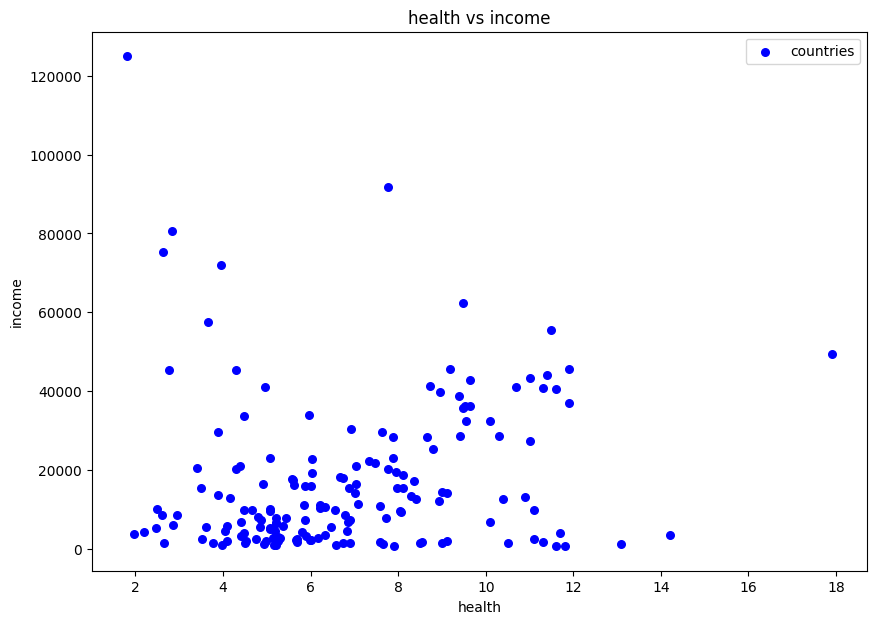

In [27]:
fig = plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1], s=30, c="blue", label = "countries")
plt.title("health vs income")
plt.xlabel("health")
plt.ylabel("income")
plt.legend()
plt.show()

#elbow_methode

In [37]:
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

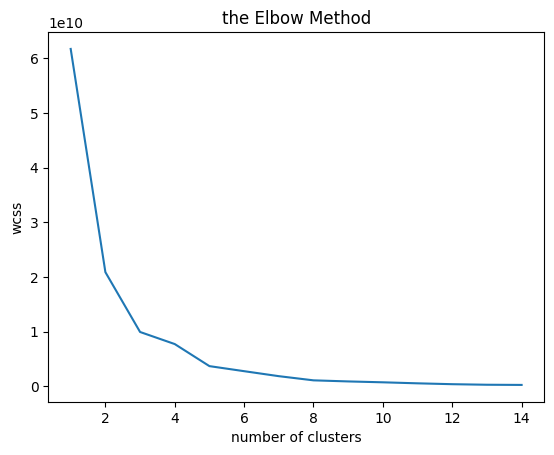

In [38]:
plt.plot(range(1,15), wcss)
plt.title("the Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

#Silhouete_methode

In [41]:
range_n_clusters = [2,4,6,8,10]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters= n_clusters, random_state=42)
  cluster_labels = clusterer.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7026408197919718
For n_clusters = 4 The average silhouette_score is : 0.653505752861461
For n_clusters = 6 The average silhouette_score is : 0.6051523708611074
For n_clusters = 8 The average silhouette_score is : 0.6013050537021969
For n_clusters = 10 The average silhouette_score is : 0.5649987239213804


In [74]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [75]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [76]:
kmeans.cluster_centers_

array([[6.39930233e+00, 8.66172868e+03],
       [8.22921053e+00, 4.59421053e+04]])

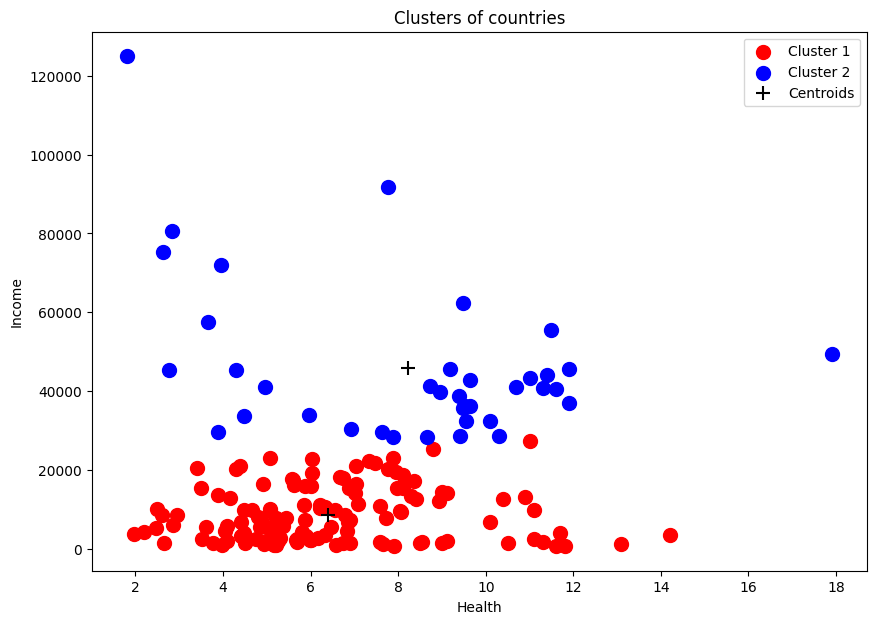

In [77]:
fig = plt.figure(figsize=(10,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids', marker="+")
plt.title('Clusters of countries')
plt.xlabel('Health')
plt.ylabel('Income')
plt.legend()
plt.show()

#Hierarchical methods

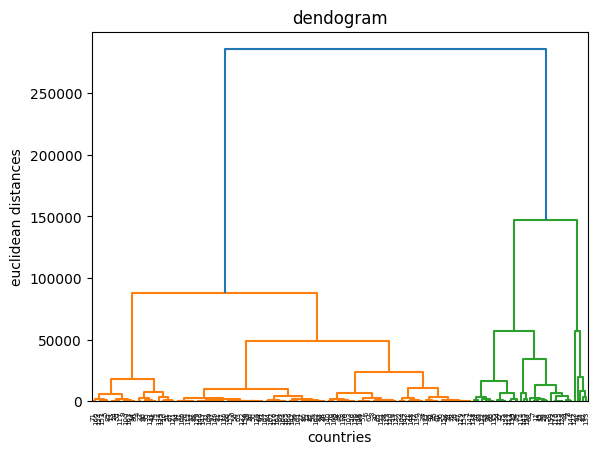

In [78]:
#dendogram
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("dendogram")
plt.xlabel("countries")
plt.ylabel("euclidean distances")
plt.show()

In [80]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
ac = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_acc = ac.fit_predict(X)

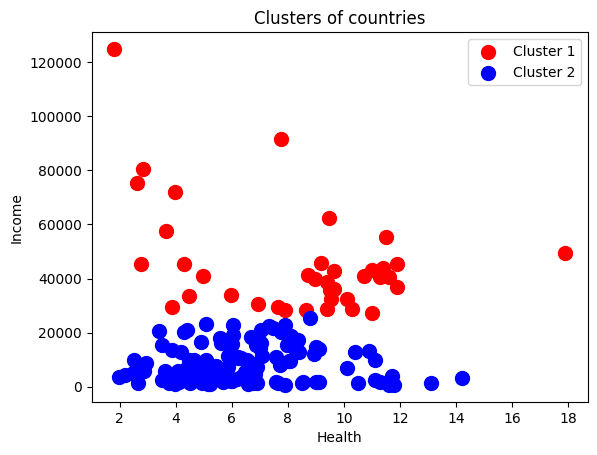

In [84]:
plt.scatter(X[y_acc == 0,0], X[y_acc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_acc == 1,0], X[y_acc == 1,1], s=100, c='blue', label='Cluster 2')
plt.title('Clusters of countries')
plt.xlabel('Health')
plt.ylabel('Income')
plt.legend()
plt.show()


#PCA(Principial Component Analsys)

In [89]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [90]:
labelencoder = LabelEncoder()
df["country"] = labelencoder.fit_transform(df["country"])

In [91]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [118]:
X=df.drop(['country', 'health'], axis=1)

In [119]:
y=df["health"]

In [120]:
X

,child_mort,exports,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...
162,29.2,46.6,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,34.4,4480,23.60,67.5,4.67,1310


In [121]:
y

,health
0,7.58
1,6.55
2,4.17
3,2.85
4,6.03
...,...
162,5.25
163,4.91
164,6.84
165,5.18


In [122]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (167, 8)
y shape: (167,)


In [123]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [126]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [127]:
explained_variance = pca.explained_variance_ratio_

In [128]:
explained_variance

array([0.51551332, 0.15733029])

In [129]:
X_train

array([[ 2.17303924e+00, -7.60529552e-01],
       [-3.31383318e-03, -1.01303556e+00],
       [ 9.68427452e-01,  5.06115711e-01],
       [-1.73540285e+00, -3.20908926e-01],
       [ 2.49109593e+00, -1.20842706e-01],
       [ 1.53706716e+00,  2.80562570e+00],
       [-2.36403647e-02, -7.85818049e-01],
       [-3.10466458e+00,  1.07939031e-01],
       [ 2.44180098e-01, -8.02513294e-02],
       [ 1.25418263e+00,  4.01093795e-01],
       [ 1.07748345e+00,  9.03669162e-01],
       [-2.92150467e+00,  2.72736591e-01],
       [-1.92829155e+00,  4.34996223e-01],
       [ 1.92205735e-01,  2.11011900e-01],
       [ 3.29035600e-01, -1.81154444e+00],
       [ 2.86742466e-01, -1.16201201e+00],
       [ 2.16995588e+00,  7.10365957e-01],
       [ 1.26320191e+00,  1.17691754e+00],
       [ 1.81859386e+00,  4.06761775e-01],
       [-4.53299555e+00,  2.33263394e+00],
       [-3.28382489e+00,  7.79802964e-01],
       [ 1.73969729e-01, -7.67703758e-01],
       [-5.56058106e-01,  8.79091997e-01],
       [-1.

In [130]:
X_test

array([[-0.83695392,  0.9578343 ],
       [-1.08839925,  1.2153261 ],
       [ 0.05613706,  0.51848369],
       [-2.10583166,  0.38116709],
       [ 3.03718242,  4.5583215 ],
       [ 2.57028095, -0.78267549],
       [-0.03240221, -0.19244635],
       [ 2.86674661, -0.16615308],
       [ 0.96104283,  0.10981517],
       [-1.06555864, -1.07648223],
       [-0.58952421, -0.35070328],
       [ 2.3202327 ,  0.23395756],
       [ 2.91191352,  1.33425486],
       [ 1.72332351,  1.32948919],
       [ 0.96688029,  0.19029975],
       [-3.73190574,  0.73088448],
       [-3.70061601,  0.30954465],
       [ 1.66159071,  1.02572784],
       [ 0.76242448, -1.11392981],
       [ 0.29612013,  0.6709422 ],
       [ 0.22617632, -0.51349947],
       [-0.09925432,  0.63185429],
       [-0.73101536, -1.14476051],
       [ 0.00670836, -0.7154353 ],
       [ 5.27443765,  6.26605418],
       [ 2.30523268, -0.98797955],
       [-1.03157477,  1.43911354],
       [ 1.85325269, -0.99769101],
       [-1.15543647,

In [131]:
X_train.shape

(133, 2)

In [134]:
from sklearn.linear_model import LinearRegression

In [137]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [138]:
y_pred = linear_model.predict(X_test)

In [140]:
y_pred

array([6.54042378, 6.44515077, 6.89171629, 6.00872141, 8.21375572,
       7.87889476, 6.83641046, 8.01620121, 7.24864667, 6.39223235,
       6.60553461, 7.80479567, 8.07529677, 7.59177064, 7.25320538,
       5.35689342, 5.35818226, 7.55841891, 7.13465236, 6.9934551 ,
       6.93285925, 6.83159625, 6.52643701, 6.83812091, 9.169996  ,
       7.76552758, 6.47433552, 7.58144477, 6.37935705, 5.87175451,
       6.87746479, 6.94913684, 6.64637259, 7.30717614])

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

# Instead of accuracy_score, use regression metrics like:
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

R-squared: -0.0726270336234569
Mean Squared Error: 8.625759383975243
